In [43]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
# text in Western (Windows 1252)

import pickle
import numpy as np
# import StringIO
import math
from keras import optimizers, metrics
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.constraints import maxnorm
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
# from keras import backend as Input
np.random.seed(7)

In [44]:
# %run ../../../prepare_data.py

import sys
sys.path.insert(0, '../../../')
from prepare_data import *

In [45]:
# X_train, X_other_features_train, y_train, X_validate, X_other_features_validate, y_validate = generate_full_matrix_inputs()
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', X_train, y_train, other_features = X_other_features_train)
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', X_validate, y_validate,  other_features = X_other_features_validate)
X_train, X_other_features_train, y_train = load_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', other_features=True)
X_validate, X_other_features_validate, y_validate = load_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', other_features=True)

In [24]:
# X_other_features = create_X_features(content)
# print (X_other_features[178200])
decode_position = 30
print (decode_input(X_train[decode_position], dictionary))
# print (X_other_features_train[0])
print (decode_X_features(feature_dictionary, [X_other_features_train[decode_position]]))
# print (len(X_other_features_train[0]))

navleèeta
Vmip3d--n
None


In [46]:
num_examples = len(X_train) # training set size
# nn_input_dim = max_word * len(dictionary) # input layer dimensionality
# nn_output_dim = max_num_vowels * max_num_vowels # output layer dimensionality
nn_output_dim = 11
nn_hdim = 516
batch_size = 16
actual_epoch = 40
num_fake_epoch = 20

# Gradient descent parameters (I picked these by hand)
# epsilon = 1 # learning rate for gradient descent
# reg_lambda = 1 # regularization strength

In [47]:
# word_processor = Sequential()
# word_processor.add(Conv1D(43, (3), input_shape=(23, 43), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(MaxPooling1D(pool_size=2))
# word_processor.add(Flatten())
# word_processor.add(Dense(516, activation='relu', kernel_constraint=maxnorm(3)))

# metadata_processor = Sequential()
# metadata_processor.add(Dense(256, input_dim=167, activation='relu'))

# model = Sequential()
# model.add(Merge([word_processor, metadata_processor], mode='concat'))  # Merge is your sensor fusion buddy
# model.add(Dense(1024, input_dim=(516 + 256), activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(nn_output_dim, activation='sigmoid'))


# -------------------------------------------------------

conv_input_shape=(23, 43)
othr_input = (167, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
x_conv = Conv1D(43, (3), padding='same', activation='relu')(conv_input)
x_conv = Conv1D(43, (3), padding='same', activation='relu')(x_conv)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)
# x_conv = Dense(516, activation='relu', kernel_constraint=maxnorm(3))(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')
# x_othr = Dense(256, input_dim=167, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(512, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(256, activation='relu')(othr_input)

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)

# model = Model(inputs=[conv_input, othr_input], output=x)

In [48]:
model = Model(inputs=[conv_input, othr_input], outputs=x)

# epochs = 5
# lrate = 0.1
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Compile model
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit_generator(generate_fake_epoch(X_train, X_other_features_train, y_train, batch_size), X_train.shape[0]/(batch_size * num_fake_epoch), epochs=actual_epoch*num_fake_epoch, validation_data=([X_validate, X_other_features_validate], y_validate))

# model.fit([X_train, X_other_features_train], y_train, validation_data=([X_validate, X_other_features_validate], y_validate), epochs=1, batch_size=16)

Epoch 1/800
1336/1335 [==============================] - 91s - loss: 0.1959 - actual_accuracy: 0.2634 - val_loss: 0.1536 - val_actual_accuracy: 0.5217
Epoch 2/800
1336/1335 [==============================] - 92s - loss: 0.1433 - actual_accuracy: 0.4928 - val_loss: 0.1310 - val_actual_accuracy: 0.5808
Epoch 3/800
1336/1335 [==============================] - 92s - loss: 0.1187 - actual_accuracy: 0.6209 - val_loss: 0.1134 - val_actual_accuracy: 0.6637
Epoch 4/800
1336/1335 [==============================] - 106s - loss: 0.1062 - actual_accuracy: 0.6818 - val_loss: 0.1029 - val_actual_accuracy: 0.7148
Epoch 5/800
1336/1335 [==============================] - 112s - loss: 0.0977 - actual_accuracy: 0.7227 - val_loss: 0.0972 - val_actual_accuracy: 0.7365
Epoch 6/800
1336/1335 [==============================] - 116s - loss: 0.0920 - actual_accuracy: 0.7467 - val_loss: 0.0925 - val_actual_accuracy: 0.7475
Epoch 7/800
1336/1335 [==============================] - 123s - loss: 0.0874 - actual_accur

1336/1335 [==============================] - 103s - loss: 0.0265 - actual_accuracy: 0.9338 - val_loss: 0.0917 - val_actual_accuracy: 0.8334
Epoch 55/800
1336/1335 [==============================] - 102s - loss: 0.0253 - actual_accuracy: 0.9385 - val_loss: 0.0933 - val_actual_accuracy: 0.8354
Epoch 56/800
1336/1335 [==============================] - 106s - loss: 0.0271 - actual_accuracy: 0.9310 - val_loss: 0.0940 - val_actual_accuracy: 0.8352
Epoch 57/800
1336/1335 [==============================] - 111s - loss: 0.0261 - actual_accuracy: 0.9363 - val_loss: 0.0927 - val_actual_accuracy: 0.8388
Epoch 58/800
1336/1335 [==============================] - 106s - loss: 0.0253 - actual_accuracy: 0.9376 - val_loss: 0.0950 - val_actual_accuracy: 0.8366
Epoch 59/800
1336/1335 [==============================] - 97s - loss: 0.0250 - actual_accuracy: 0.9400 - val_loss: 0.1005 - val_actual_accuracy: 0.8283
Epoch 60/800
1336/1335 [==============================] - 99s - loss: 0.0263 - actual_accuracy: 

1336/1335 [==============================] - 110s - loss: 0.0155 - actual_accuracy: 0.9625 - val_loss: 0.1092 - val_actual_accuracy: 0.8494
Epoch 108/800
1336/1335 [==============================] - 107s - loss: 0.0158 - actual_accuracy: 0.9617 - val_loss: 0.1146 - val_actual_accuracy: 0.8517
Epoch 109/800
1336/1335 [==============================] - 104s - loss: 0.0143 - actual_accuracy: 0.9655 - val_loss: 0.1202 - val_actual_accuracy: 0.8514
Epoch 110/800
1336/1335 [==============================] - 98s - loss: 0.0146 - actual_accuracy: 0.9634 - val_loss: 0.1124 - val_actual_accuracy: 0.8563
Epoch 111/800
1336/1335 [==============================] - 99s - loss: 0.0141 - actual_accuracy: 0.9675 - val_loss: 0.1115 - val_actual_accuracy: 0.8543
Epoch 112/800
1336/1335 [==============================] - 101s - loss: 0.0152 - actual_accuracy: 0.9622 - val_loss: 0.1088 - val_actual_accuracy: 0.8547
Epoch 113/800
1336/1335 [==============================] - 91s - loss: 0.0138 - actual_accur

1336/1335 [==============================] - 96s - loss: 0.0100 - actual_accuracy: 0.9761 - val_loss: 0.1198 - val_actual_accuracy: 0.8573
Epoch 161/800
1336/1335 [==============================] - 102s - loss: 0.0104 - actual_accuracy: 0.9747 - val_loss: 0.1184 - val_actual_accuracy: 0.8602
Epoch 162/800
1336/1335 [==============================] - 101s - loss: 0.0095 - actual_accuracy: 0.9782 - val_loss: 0.1244 - val_actual_accuracy: 0.8555
Epoch 163/800
1336/1335 [==============================] - 101s - loss: 0.0104 - actual_accuracy: 0.9760 - val_loss: 0.1223 - val_actual_accuracy: 0.8533
Epoch 164/800
1336/1335 [==============================] - 98s - loss: 0.0091 - actual_accuracy: 0.9789 - val_loss: 0.1300 - val_actual_accuracy: 0.8573
Epoch 165/800
1336/1335 [==============================] - 102s - loss: 0.0104 - actual_accuracy: 0.9763 - val_loss: 0.1209 - val_actual_accuracy: 0.8576
Epoch 166/800
1336/1335 [==============================] - 99s - loss: 0.0092 - actual_accur

1336/1335 [==============================] - 115s - loss: 0.0077 - actual_accuracy: 0.9819 - val_loss: 0.1320 - val_actual_accuracy: 0.8528
Epoch 214/800
1336/1335 [==============================] - 112s - loss: 0.0080 - actual_accuracy: 0.9818 - val_loss: 0.1286 - val_actual_accuracy: 0.8571
Epoch 215/800
1336/1335 [==============================] - 106s - loss: 0.0072 - actual_accuracy: 0.9838 - val_loss: 0.1232 - val_actual_accuracy: 0.8621
Epoch 216/800
1336/1335 [==============================] - 112s - loss: 0.0083 - actual_accuracy: 0.9819 - val_loss: 0.1302 - val_actual_accuracy: 0.8557
Epoch 217/800
1336/1335 [==============================] - 109s - loss: 0.0074 - actual_accuracy: 0.9836 - val_loss: 0.1309 - val_actual_accuracy: 0.8586
Epoch 218/800
1336/1335 [==============================] - 106s - loss: 0.0072 - actual_accuracy: 0.9831 - val_loss: 0.1423 - val_actual_accuracy: 0.8576
Epoch 219/800
1336/1335 [==============================] - 104s - loss: 0.0072 - actual_ac

1336/1335 [==============================] - 101s - loss: 0.0059 - actual_accuracy: 0.9865 - val_loss: 0.1451 - val_actual_accuracy: 0.8531
Epoch 267/800
1336/1335 [==============================] - 103s - loss: 0.0067 - actual_accuracy: 0.9847 - val_loss: 0.1422 - val_actual_accuracy: 0.8627
Epoch 268/800
1336/1335 [==============================] - 98s - loss: 0.0068 - actual_accuracy: 0.9855 - val_loss: 0.1330 - val_actual_accuracy: 0.8645
Epoch 269/800
1336/1335 [==============================] - 100s - loss: 0.0060 - actual_accuracy: 0.9869 - val_loss: 0.1450 - val_actual_accuracy: 0.8619
Epoch 270/800
1336/1335 [==============================] - 97s - loss: 0.0067 - actual_accuracy: 0.9843 - val_loss: 0.1348 - val_actual_accuracy: 0.8659
Epoch 271/800
1336/1335 [==============================] - 99s - loss: 0.0063 - actual_accuracy: 0.9862 - val_loss: 0.1449 - val_actual_accuracy: 0.8531
Epoch 272/800
1336/1335 [==============================] - 99s - loss: 0.0067 - actual_accura

1336/1335 [==============================] - 141s - loss: 0.0056 - actual_accuracy: 0.9880 - val_loss: 0.1461 - val_actual_accuracy: 0.8609
Epoch 320/800
1336/1335 [==============================] - 149s - loss: 0.0058 - actual_accuracy: 0.9873 - val_loss: 0.1331 - val_actual_accuracy: 0.8588
Epoch 321/800
1336/1335 [==============================] - 132s - loss: 0.0061 - actual_accuracy: 0.9861 - val_loss: 0.1292 - val_actual_accuracy: 0.8654
Epoch 322/800
1336/1335 [==============================] - 118s - loss: 0.0058 - actual_accuracy: 0.9882 - val_loss: 0.1407 - val_actual_accuracy: 0.8646
Epoch 323/800
1336/1335 [==============================] - 118s - loss: 0.0059 - actual_accuracy: 0.9870 - val_loss: 0.1395 - val_actual_accuracy: 0.8622
Epoch 324/800
1336/1335 [==============================] - 118s - loss: 0.0050 - actual_accuracy: 0.9888 - val_loss: 0.1472 - val_actual_accuracy: 0.8580
Epoch 325/800
1336/1335 [==============================] - 119s - loss: 0.0057 - actual_ac

1336/1335 [==============================] - 99s - loss: 0.0052 - actual_accuracy: 0.9885 - val_loss: 0.1453 - val_actual_accuracy: 0.8645
Epoch 373/800
1336/1335 [==============================] - 109s - loss: 0.0057 - actual_accuracy: 0.9877 - val_loss: 0.1469 - val_actual_accuracy: 0.8628
Epoch 374/800
1336/1335 [==============================] - 104s - loss: 0.0056 - actual_accuracy: 0.9877 - val_loss: 0.1345 - val_actual_accuracy: 0.8674
Epoch 375/800
1336/1335 [==============================] - 102s - loss: 0.0047 - actual_accuracy: 0.9894 - val_loss: 0.1435 - val_actual_accuracy: 0.8625
Epoch 376/800
1336/1335 [==============================] - 98s - loss: 0.0061 - actual_accuracy: 0.9860 - val_loss: 0.1364 - val_actual_accuracy: 0.8654
Epoch 377/800
1336/1335 [==============================] - 97s - loss: 0.0056 - actual_accuracy: 0.9882 - val_loss: 0.1409 - val_actual_accuracy: 0.8606
Epoch 378/800
1336/1335 [==============================] - 101s - loss: 0.0050 - actual_accur

1336/1335 [==============================] - 107s - loss: 0.0047 - actual_accuracy: 0.9888 - val_loss: 0.1351 - val_actual_accuracy: 0.8669
Epoch 426/800
1336/1335 [==============================] - 105s - loss: 0.0042 - actual_accuracy: 0.9906 - val_loss: 0.1450 - val_actual_accuracy: 0.8631
Epoch 427/800
1336/1335 [==============================] - 106s - loss: 0.0053 - actual_accuracy: 0.9881 - val_loss: 0.1521 - val_actual_accuracy: 0.8632
Epoch 428/800
1336/1335 [==============================] - 105s - loss: 0.0054 - actual_accuracy: 0.9879 - val_loss: 0.1380 - val_actual_accuracy: 0.8676
Epoch 429/800
1336/1335 [==============================] - 104s - loss: 0.0052 - actual_accuracy: 0.9892 - val_loss: 0.1263 - val_actual_accuracy: 0.8685
Epoch 430/800
1336/1335 [==============================] - 101s - loss: 0.0046 - actual_accuracy: 0.9898 - val_loss: 0.1471 - val_actual_accuracy: 0.8641
Epoch 431/800
1336/1335 [==============================] - 99s - loss: 0.0049 - actual_acc

1336/1335 [==============================] - 101s - loss: 0.0044 - actual_accuracy: 0.9898 - val_loss: 0.1533 - val_actual_accuracy: 0.8635
Epoch 479/800
1336/1335 [==============================] - 106s - loss: 0.0052 - actual_accuracy: 0.9894 - val_loss: 0.1532 - val_actual_accuracy: 0.8634
Epoch 480/800
1336/1335 [==============================] - 95s - loss: 0.0040 - actual_accuracy: 0.9910 - val_loss: 0.1520 - val_actual_accuracy: 0.8682
Epoch 481/800
1336/1335 [==============================] - 112s - loss: 0.0050 - actual_accuracy: 0.9888 - val_loss: 0.1602 - val_actual_accuracy: 0.8613
Epoch 482/800
1336/1335 [==============================] - 106s - loss: 0.0051 - actual_accuracy: 0.9893 - val_loss: 0.1400 - val_actual_accuracy: 0.8660
Epoch 483/800
1336/1335 [==============================] - 105s - loss: 0.0042 - actual_accuracy: 0.9910 - val_loss: 0.1469 - val_actual_accuracy: 0.8680
Epoch 484/800
1336/1335 [==============================] - 102s - loss: 0.0043 - actual_acc

1336/1335 [==============================] - 104s - loss: 0.0043 - actual_accuracy: 0.9909 - val_loss: 0.1677 - val_actual_accuracy: 0.8611
Epoch 532/800
1336/1335 [==============================] - 103s - loss: 0.0045 - actual_accuracy: 0.9904 - val_loss: 0.1366 - val_actual_accuracy: 0.8666
Epoch 533/800
1336/1335 [==============================] - 99s - loss: 0.0046 - actual_accuracy: 0.9904 - val_loss: 0.1560 - val_actual_accuracy: 0.8622
Epoch 534/800
1336/1335 [==============================] - 102s - loss: 0.0039 - actual_accuracy: 0.9919 - val_loss: 0.1593 - val_actual_accuracy: 0.8635
Epoch 535/800
1336/1335 [==============================] - 100s - loss: 0.0044 - actual_accuracy: 0.9903 - val_loss: 0.1433 - val_actual_accuracy: 0.8630
Epoch 536/800
1336/1335 [==============================] - 106s - loss: 0.0046 - actual_accuracy: 0.9904 - val_loss: 0.1468 - val_actual_accuracy: 0.8675
Epoch 537/800
1336/1335 [==============================] - 99s - loss: 0.0043 - actual_accu

1336/1335 [==============================] - 114s - loss: 0.0037 - actual_accuracy: 0.9918 - val_loss: 0.1608 - val_actual_accuracy: 0.8649
Epoch 585/800
1336/1335 [==============================] - 110s - loss: 0.0044 - actual_accuracy: 0.9911 - val_loss: 0.1518 - val_actual_accuracy: 0.8648
Epoch 586/800
1336/1335 [==============================] - 106s - loss: 0.0043 - actual_accuracy: 0.9905 - val_loss: 0.1561 - val_actual_accuracy: 0.8682
Epoch 587/800
1336/1335 [==============================] - 108s - loss: 0.0043 - actual_accuracy: 0.9913 - val_loss: 0.1625 - val_actual_accuracy: 0.8665
Epoch 588/800
1336/1335 [==============================] - 112s - loss: 0.0046 - actual_accuracy: 0.9911 - val_loss: 0.1550 - val_actual_accuracy: 0.8612
Epoch 589/800
1336/1335 [==============================] - 111s - loss: 0.0040 - actual_accuracy: 0.9917 - val_loss: 0.1733 - val_actual_accuracy: 0.8588
Epoch 590/800
1336/1335 [==============================] - 107s - loss: 0.0040 - actual_ac

1336/1335 [==============================] - 109s - loss: 0.0046 - actual_accuracy: 0.9904 - val_loss: 0.1313 - val_actual_accuracy: 0.8683
Epoch 638/800
1336/1335 [==============================] - 106s - loss: 0.0040 - actual_accuracy: 0.9913 - val_loss: 0.1478 - val_actual_accuracy: 0.8691
Epoch 639/800
1336/1335 [==============================] - 108s - loss: 0.0034 - actual_accuracy: 0.9930 - val_loss: 0.1496 - val_actual_accuracy: 0.8723
Epoch 640/800
1336/1335 [==============================] - 110s - loss: 0.0041 - actual_accuracy: 0.9911 - val_loss: 0.1454 - val_actual_accuracy: 0.8695
Epoch 641/800
1336/1335 [==============================] - 120s - loss: 0.0042 - actual_accuracy: 0.9902 - val_loss: 0.1489 - val_actual_accuracy: 0.8689
Epoch 642/800
1336/1335 [==============================] - 107s - loss: 0.0045 - actual_accuracy: 0.9904 - val_loss: 0.1485 - val_actual_accuracy: 0.8679
Epoch 643/800
1336/1335 [==============================] - 113s - loss: 0.0036 - actual_ac

1336/1335 [==============================] - 106s - loss: 0.0038 - actual_accuracy: 0.9915 - val_loss: 0.1475 - val_actual_accuracy: 0.8595
Epoch 691/800
1336/1335 [==============================] - 102s - loss: 0.0041 - actual_accuracy: 0.9913 - val_loss: 0.1666 - val_actual_accuracy: 0.8612
Epoch 692/800
1336/1335 [==============================] - 103s - loss: 0.0037 - actual_accuracy: 0.9925 - val_loss: 0.1605 - val_actual_accuracy: 0.8688
Epoch 693/800
1336/1335 [==============================] - 105s - loss: 0.0042 - actual_accuracy: 0.9917 - val_loss: 0.1604 - val_actual_accuracy: 0.8629
Epoch 694/800
1336/1335 [==============================] - 107s - loss: 0.0040 - actual_accuracy: 0.9925 - val_loss: 0.1464 - val_actual_accuracy: 0.8680
Epoch 695/800
1336/1335 [==============================] - 112s - loss: 0.0037 - actual_accuracy: 0.9917 - val_loss: 0.1567 - val_actual_accuracy: 0.8665
Epoch 696/800
1336/1335 [==============================] - 106s - loss: 0.0039 - actual_ac

1336/1335 [==============================] - 108s - loss: 0.0037 - actual_accuracy: 0.9918 - val_loss: 0.1699 - val_actual_accuracy: 0.8697
Epoch 744/800
1336/1335 [==============================] - 106s - loss: 0.0035 - actual_accuracy: 0.9927 - val_loss: 0.1418 - val_actual_accuracy: 0.8703
Epoch 745/800
1336/1335 [==============================] - 110s - loss: 0.0038 - actual_accuracy: 0.9926 - val_loss: 0.1571 - val_actual_accuracy: 0.8686
Epoch 746/800
1336/1335 [==============================] - 105s - loss: 0.0042 - actual_accuracy: 0.9916 - val_loss: 0.1427 - val_actual_accuracy: 0.8691
Epoch 747/800
1336/1335 [==============================] - 105s - loss: 0.0039 - actual_accuracy: 0.9914 - val_loss: 0.1548 - val_actual_accuracy: 0.8688
Epoch 748/800
1336/1335 [==============================] - 116s - loss: 0.0042 - actual_accuracy: 0.9912 - val_loss: 0.1559 - val_actual_accuracy: 0.8653
Epoch 749/800
1336/1335 [==============================] - 113s - loss: 0.0033 - actual_ac

1336/1335 [==============================] - 111s - loss: 0.0036 - actual_accuracy: 0.9925 - val_loss: 0.1474 - val_actual_accuracy: 0.8632
Epoch 797/800
1336/1335 [==============================] - 105s - loss: 0.0039 - actual_accuracy: 0.9920 - val_loss: 0.1473 - val_actual_accuracy: 0.8609
Epoch 798/800
1336/1335 [==============================] - 111s - loss: 0.0034 - actual_accuracy: 0.9928 - val_loss: 0.1592 - val_actual_accuracy: 0.8654
Epoch 799/800
1336/1335 [==============================] - 110s - loss: 0.0041 - actual_accuracy: 0.9921 - val_loss: 0.1562 - val_actual_accuracy: 0.8685
Epoch 800/800
1336/1335 [==============================] - 110s - loss: 0.0035 - actual_accuracy: 0.9926 - val_loss: 0.1555 - val_actual_accuracy: 0.8629


In [54]:
name = '40_epoch'
model.save(name + '.h5')
output = open(name + '_history.pkl', 'wb')
pickle.dump(history.history, output)
output.close()

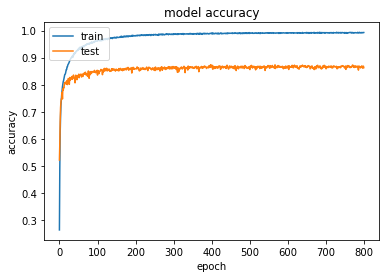

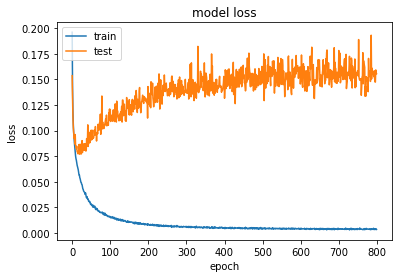

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['actual_accuracy'])
plt.plot(history.history['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model = load_model('test.h5')

In [6]:
h5f.close()

NameError: name 'h5f' is not defined

In [67]:
# evaluate the model
scores = model.evaluate([X_validate, X_other_features_validate], y_validate)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

108736/108961 [============================>.] - ETA: 0s
acc: 96.57%


In [187]:
pos = 0
print(decode_input(X_validate[pos], dictionary))
# predictions = model.predict([X_validate, X_other_features_validate])
predictions2 = model.predict([X_validate[pos:pos+1], X_other_features_validate[pos:pos+1]])
# print(predictions2)
print(np.round(predictions2)[0])
# predictions = np.round(predictions)
print(y_validate[pos])
# accuracy = sum([1 if np.all(y_validate[i] == predictions[i]) else 0 for i in range(X_validate.shape[0])])/float(X_validate.shape[0])
# print(accuracy)


import keras.backend as K

def act_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.mean(K.equal(K.round(y_true), K.round(y_pred)), axis=-1), 1.0))


def mean_pred2(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
#     return K.mean(K.all(K.equal(y_true, y_pred), axis=-1))
#     return K.equal(K.round(y_true), K.round(y_pred))

print(mean_pred(y_validate[pos], predictions[pos]).eval())
print(mean_pred(np.array([[ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 
                np.array([[ 0.,  0.51,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  0.92,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).eval())
# print(mean_pred(y_validate[pos], predictions[pos]))
# print(mean_pred2(y_validate[pos], predictions[pos]))
print(metrics.categorical_accuracy(y_validate[pos], predictions[pos]))

nerazloènejši
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
1.0
1.0
Elemwise{Cast{float32}}.0


In [ ]:
predictions = model.predict(X[429145:])

In [21]:
decode_position(predictions[0], max_num_vowels)

[1, 0]

In [23]:
def test_accuracy(predictions, y):
    dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
    num_of_pred = len(predictions)
    num_of_correct_pred = 0
    for i in range(predictions.shape[0]):
        if decode_position(predictions[i], max_num_vowels) == decode_position(y[i], max_num_vowels):
            num_of_correct_pred += 1

    return (num_of_correct_pred/float(num_of_pred)) * 100


print(test_accuracy(predictions, y[429145:]))

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
107287
96.5186835311


In [17]:
predictions.shape

(107287, 121)

In [12]:
print max_num_vowels

11


In [31]:
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
feature_dictionary = create_feature_dictionary(content)
def generate_input_from_word(word, max_word, dictionary):
    x = np.zeros((max_word, len(dictionary)))
    j = 0
    for c in list(word):
        index = 0
        for d in dictionary:
            if c == d:
                x[j, index] = 1
                break
            index += 1
        j += 1
    return x

# model = load_model()
# prediction = predict(model, generate_input_from_word('hidrija'))
# print decode_position(prediction[0])

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [190]:
%run ../../../prepare_data.py
# generate_X_and_y(dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels, feature_dictionary)